<a href="https://colab.research.google.com/github/EnzoGui18/Analise_Beauty/blob/main/AnaliseSal%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


num_days = len(pd.date_range(start='2023-06-01', end='2023-08-31', freq='D'))
services = ['Haircut', 'Manicure', 'Pedicure', 'Hair Dye', 'Facial', 'Massage']
customers = [25, 18, 30, 22, 20, 15]
revenues = [1000, 750, 1200, 950, 850, 700]

data = {
    'Date': pd.date_range(start='2023-06-01', end='2023-08-31', freq='D').tolist(),
    'Service': (services * (num_days // len(services) + 1))[:num_days],
    'Number_of_Customers': (customers * (num_days // len(customers) + 1))[:num_days],
    'Revenue': (revenues * (num_days // len(revenues) + 1))[:num_days],
    'Day_of_Week': pd.date_range(start='2023-06-01', end='2023-08-31', freq='D').day_name().tolist()
}

In [4]:
# Criação do DataFrame
df = pd.DataFrame(data)

In [5]:
# Análise dos dados
# 1. Resumo dos clientes e receita por serviço
summary = df.groupby('Service').agg({
    'Number_of_Customers': ['sum', 'mean'],
    'Revenue': ['sum', 'mean']
}).reset_index()


In [6]:
# 2. Total de clientes e receita
total_customers = df['Number_of_Customers'].sum()
total_revenue = df['Revenue'].sum()

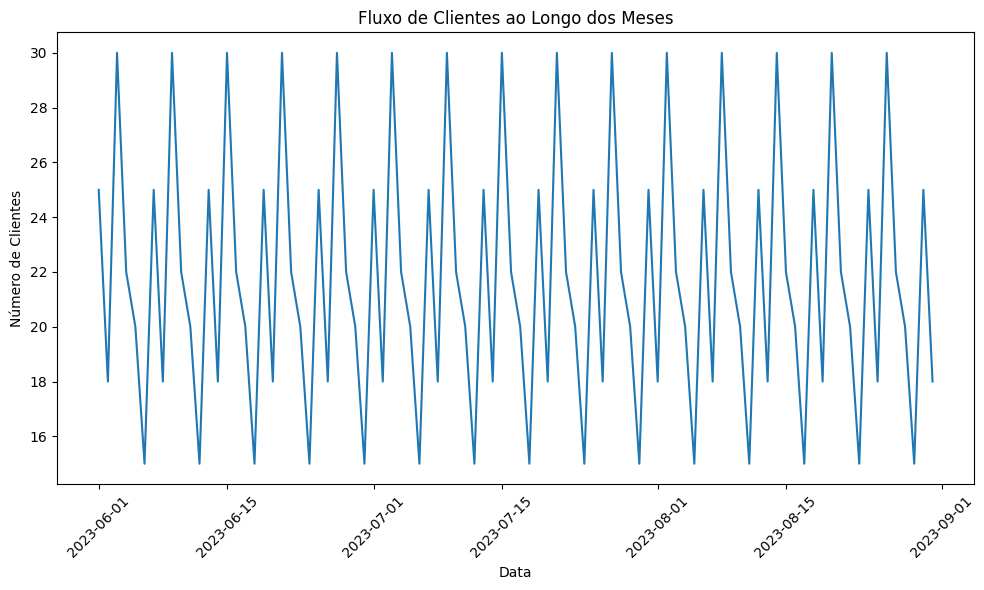

In [8]:
# 3. Evolução do fluxo de clientes ao longo dos meses
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Number_of_Customers', data=df)
plt.title('Fluxo de Clientes ao Longo dos Meses')
plt.ylabel('Número de Clientes')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('fluxo_clientes.png')


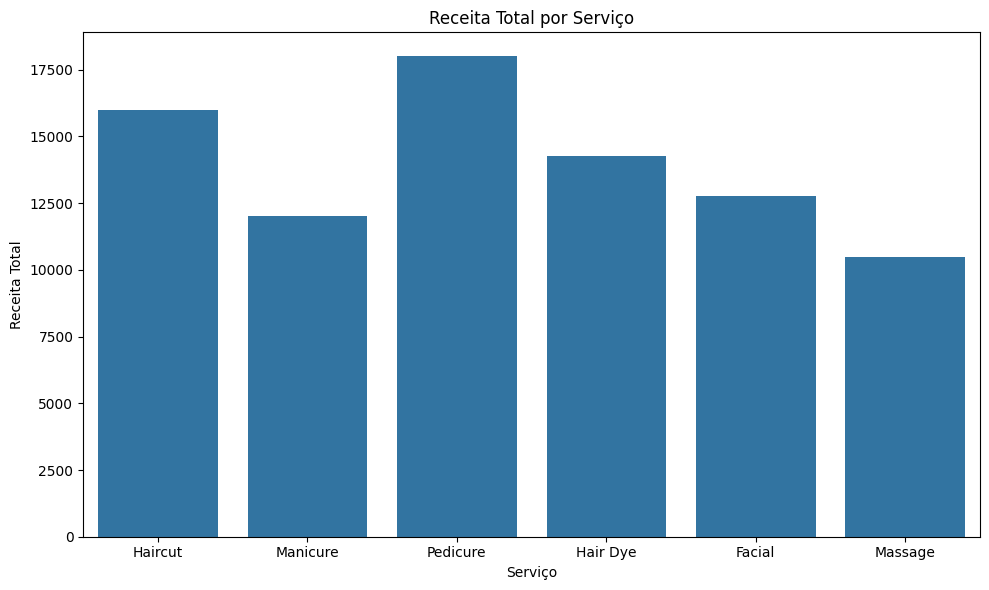

In [9]:
# 4. Receita por serviço (gráfico de barras)
plt.figure(figsize=(10,6))
sns.barplot(x='Service', y='Revenue', data=df, estimator=sum)
plt.title('Receita Total por Serviço')
plt.ylabel('Receita Total')
plt.xlabel('Serviço')
plt.tight_layout()
plt.savefig('receita_por_servico.png')

<Figure size 1000x600 with 0 Axes>

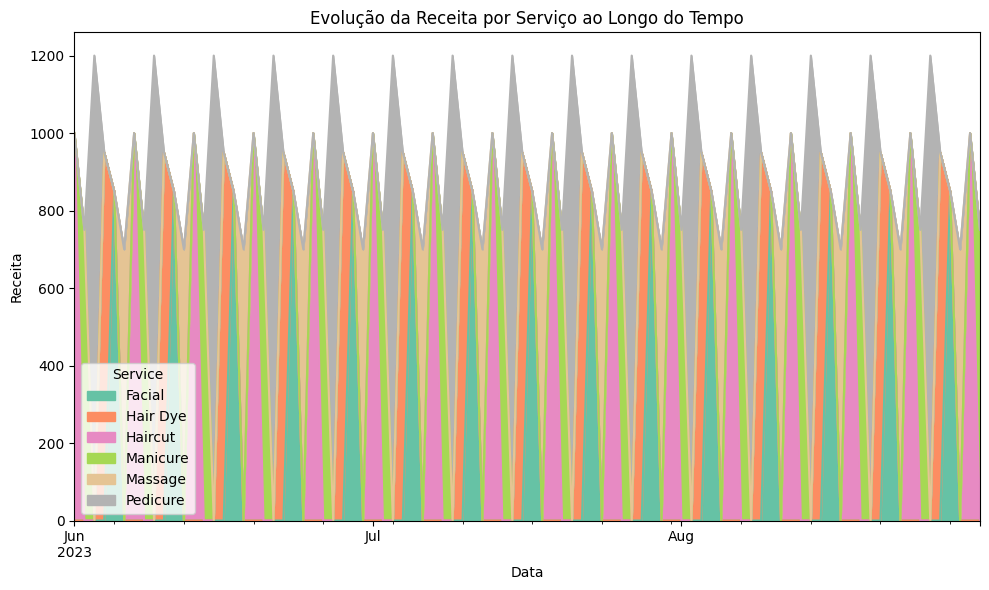

In [10]:
# 5. Gráfico de área empilhada da receita por serviço
df['Month'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(10,6))
df_pivot = df.pivot_table(values='Revenue', index='Date', columns='Service', aggfunc='sum').fillna(0)
df_pivot.plot(kind='area', stacked=True, figsize=(10,6), cmap="Set2")
plt.title('Evolução da Receita por Serviço ao Longo do Tempo')
plt.ylabel('Receita')
plt.xlabel('Data')
plt.tight_layout()
plt.savefig('evolucao_receita.png')

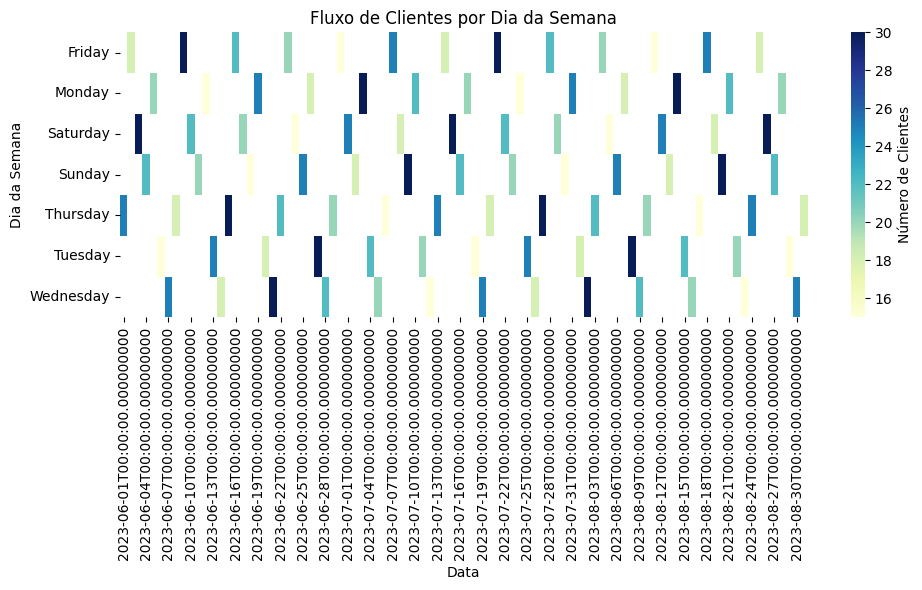

In [12]:
# 6. Mapa de calor de fluxo de clientes por dia da semana
plt.figure(figsize=(10,6))
heatmap_data = df.pivot_table(values='Number_of_Customers', index='Day_of_Week', columns='Date', aggfunc='sum')
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Número de Clientes'})
plt.title('Fluxo de Clientes por Dia da Semana')
plt.ylabel('Dia da Semana')
plt.xlabel('Data')
plt.tight_layout()
plt.savefig('fluxo_dia_da_semana.png')

In [13]:
# 7. Exibe o resumo da análise
print(f"Total de Clientes: {total_customers}")
print(f"Receita Total: R$ {total_revenue}")
print("\nResumo por Serviço:\n", summary)

Total de Clientes: 1993
Receita Total: R$ 83500

Resumo por Serviço:
     Service Number_of_Customers       Revenue        
                            sum  mean     sum    mean
0    Facial                 300  20.0   12750   850.0
1  Hair Dye                 330  22.0   14250   950.0
2   Haircut                 400  25.0   16000  1000.0
3  Manicure                 288  18.0   12000   750.0
4   Massage                 225  15.0   10500   700.0
5  Pedicure                 450  30.0   18000  1200.0
